# EDA Vizualization

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

### Word Cloud

In [6]:
file_path = '../data/csv/top100_source.csv'
source_df = pd.read_csv(file_path)
source_df.head()

,source,frequency,total_score
0,Reuters,319453,327004
1,rajacreator,68753,68753
2,AP,63886,67112
3,bluzz,57339,57337
4,reuters,39747,34230489


In [7]:
def normalize_source_name(source):
    source = source.lower()
    if source in ['reuters', 'reuter']:
        return 'reuters'
    elif source in ['youtu', 'youtube']:
        return 'youtube'
    else:
        return source

# Normalize source names in the DataFrame
source_df['source'] = source_df['source'].apply(normalize_source_name)
source_df = source_df.groupby('source').agg({'frequency': 'sum', 'total_score': 'sum'}).reset_index()
source_df = source_df.sort_values(by='frequency', ascending=False).reset_index(drop = True)
source_df.head()

,source,frequency,total_score
0,reuters,359200,34557493
1,rajacreator,68753,68753
2,ap,63886,67112
3,youtube,57483,57338
4,bluzz,57339,57337


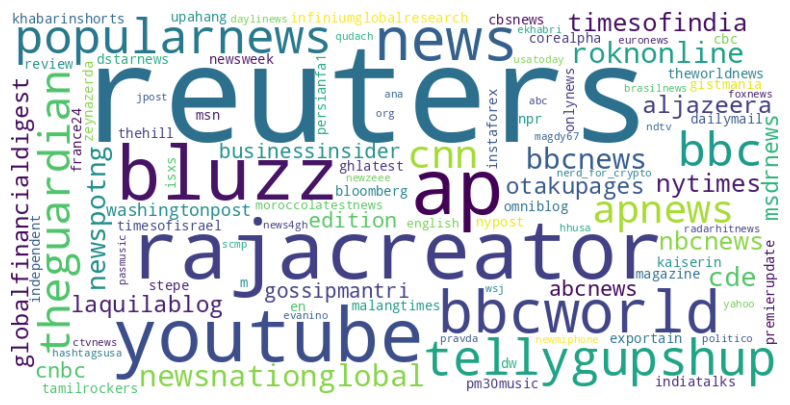

In [8]:
def generate_word_cloud(data, column, file_name):
    # Create a text string for the word cloud
    text = ''.join([(str(row['source']) + ' ') * int(row[column]) for index, row in data.iterrows()])
    # print(text)
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations = False,).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    # Save the plot
    plt.savefig(file_name, format='png', bbox_inches='tight')
    plt.close()

    
# Paths for saving word clouds
freq_cloud_path = '../data/plots/frequency_wordcloud.png'
score_cloud_path = '../data/plots/score_wordcloud.png'

# Generate a word cloud for 'frequency'
generate_word_cloud(source_df, 'frequency', freq_cloud_path)

# Generate a word cloud for 'total_score'
# generate_word_cloud(source_df, 'total_score', score_cloud_path)

### Graphs

In [10]:
#misinformation
misinfo = pd.read_csv('../data/csv/misinformation.csv')

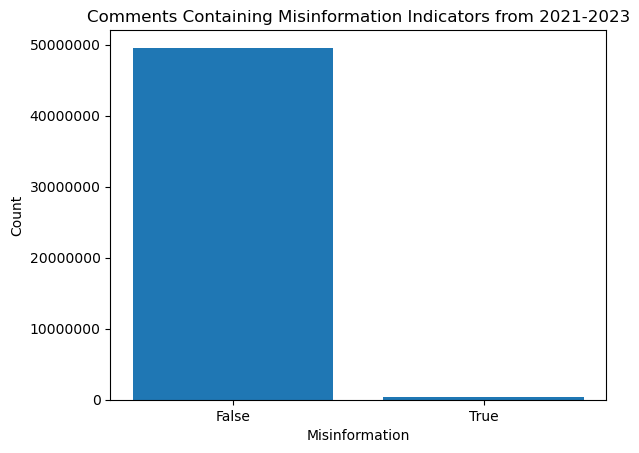

In [11]:
x = [0,1]
mis_class = ['False', 'True']

plt.bar(misinfo['misinfo_class'],misinfo['count'])
plt.ticklabel_format(style='plain')
plt.xlabel("Misinformation")
plt.ylabel("Count")
plt.xticks(x, mis_class)
plt.title("Comments Containing Misinformation Indicators from 2021-2023")
plt.savefig("../data/plots/misinformation.png")

In [14]:
#comments by day 
day_of_week = pd.read_csv('../data/csv/comments_day.csv')

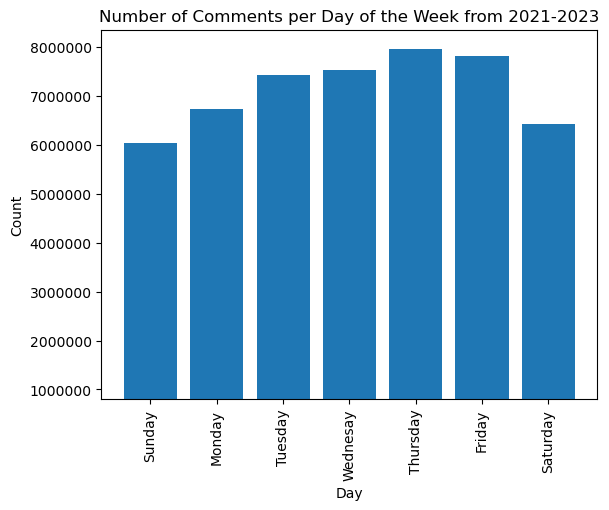

In [15]:
#comments by day
days = ['Sunday','Monday','Tuesday','Wednesay','Thursday','Friday','Saturday']
x = [1,2,3,4,5,6,7]

plt.bar(day_of_week['day'],day_of_week['count'])
plt.ticklabel_format(style='plain')
plt.xlabel("Day")
plt.ylabel("Count")
plt.ylim(800000)
plt.xticks(x, days, rotation='vertical')
plt.title("Number of Comments per Day of the Week from 2021-2023")
plt.savefig("../data/plots/day_of_week.png")

In [16]:
#submissions day
submissions_day = pd.read_csv('../data/csv/submissions_day.csv')

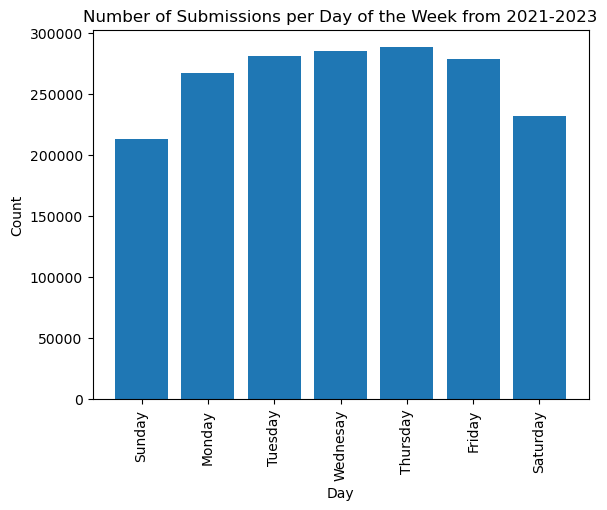

In [17]:
#create submissions per day graph
days = ['Sunday','Monday','Tuesday','Wednesay','Thursday','Friday','Saturday']
x = [1,2,3,4,5,6,7]

plt.bar(submissions_day['day'],submissions_day['count'])
plt.ticklabel_format(style='plain')
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(x, days, rotation='vertical')
plt.title("Number of Submissions per Day of the Week from 2021-2023")
plt.savefig("../data/plots/submissions_day.png")

In [43]:
#top users
top_news_authors = pd.read_csv('../data/csv/top_news_authors.csv')
top_worldnews_authors = pd.read_csv('../data/csv/top_worldnews_authors.csv')

In [44]:
top_news_authors = top_news_authors.iloc[1:5]

# to spark pandas dataframe
top_worldnews_authors = top_worldnews_authors.iloc[1:5]


In [45]:
news_counts = top_news_authors["submission_count"].tolist()
worldnews_counts = top_worldnews_authors["submission_count"].tolist()
n = len(news_counts)

In [46]:
top_worldnews_authors

,author,submission_count
1,harryg888,57339
2,theworldnnews,5509
3,AdrienSergent,5139
4,Infoseven7,5107


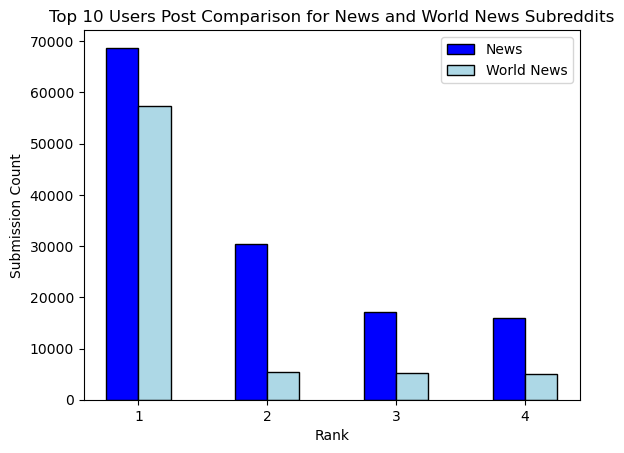

In [47]:
# Bar positions
r = np.arange(n)
width = 0.25

# Plotting
plt.bar(r, news_counts, color='blue', width=width, edgecolor='black', label='News')
plt.bar(r + width, worldnews_counts, color='lightblue', width=width, edgecolor='black', label='World News')

# Labels and title
plt.xlabel("Rank")
plt.ylabel("Submission Count")
plt.title("Top 10 Users Post Comparison for News and World News Subreddits")
plt.xticks(r + width/2, range(1, n+1))

# Legend
plt.legend()

# save to png
plt.savefig('../data/plots/top_users_comparison.png')

# Show plot
plt.show()